# CNN
## TensorFlow
### CNN Basics

In [17]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 3, 3, 1)


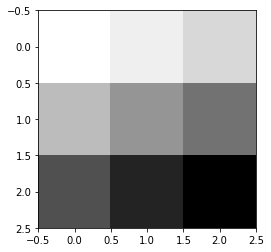

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],[[4],[5],[6]], [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


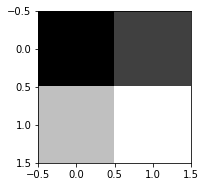

In [3]:
# Filter: 2, 2, 1, 1 ((size, size), color, # of filters)
# mulitplication + addition

weight = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
print('weight.shape', weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')

conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


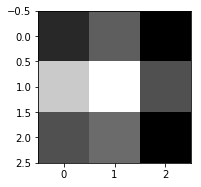

In [4]:
# output image size SAME as the input
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

##### 3 filters (2,2,1,3)

weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


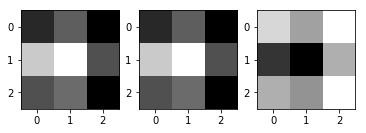

In [5]:
weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

##### Max Pooling

In [6]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


##### MNIST

In [4]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


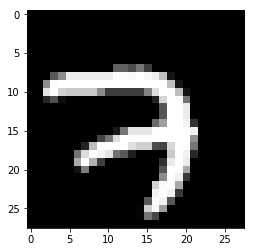

In [3]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

##### MNIST Convolution Layer

Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


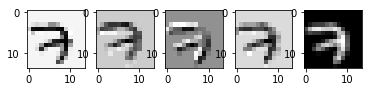

In [9]:
img = img.reshape(-1,28,28,1) # image: 28 x 28 with 1 color
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) 
# 5 filters: 3 x 3 with 1 color - with random weights
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') # output: 14 x 14
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

##### MNIST Max Pooling

Tensor("MaxPool_1:0", shape=(1, 7, 7, 5), dtype=float32)


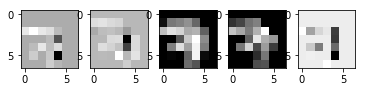

In [10]:
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
# output: 7 x 7, subsampling
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

### MNIST CNN - simple

In [11]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, [None, 10])

In [12]:
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 32 filters
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1

<tf.Tensor 'MaxPool_2:0' shape=(?, 14, 14, 32) dtype=float32>

In [13]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) # 64 filters
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2_flat = tf.reshape(L2, [-1, 7 * 7 * 64])
L2

<tf.Tensor 'MaxPool_3:0' shape=(?, 7, 7, 64) dtype=float32>

In [14]:
W3 = tf.get_variable("W3", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L2_flat, W3) + b
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [15]:
import random

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

Epoch: 0001 cost = 0.354631212
Epoch: 0002 cost = 0.098963875
Epoch: 0003 cost = 0.070669603
Epoch: 0004 cost = 0.058173028
Epoch: 0005 cost = 0.049222966
Epoch: 0006 cost = 0.042712224
Epoch: 0007 cost = 0.038066180
Epoch: 0008 cost = 0.033661400
Epoch: 0009 cost = 0.029634245
Epoch: 0010 cost = 0.026147703
Epoch: 0011 cost = 0.023307886
Epoch: 0012 cost = 0.019125698
Epoch: 0013 cost = 0.019624088
Epoch: 0014 cost = 0.016445075
Epoch: 0015 cost = 0.013349670
Learning Finished!
Accuracy: 0.9871
Label:  [2]
Prediction:  [2]


### Deep CNN

In [16]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 32 filters
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob = keep_prob)

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01)) # 64 filters
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob = keep_prob)

W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01)) # 64 filters
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob = keep_prob)
L3 = tf.reshape(L3, [-1, 128 * 4 * 4])

W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                     initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
L4 = tf.nn.dropout(L4, keep_prob = keep_prob)

W5 = tf.get_variable("W5", shape=[625, 10], 
                     initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(L4, W5) + b5

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys, keep_prob: 0.7}
        c, _ = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Accuracy:', sess.run(accuracy, feed_dict={
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(logits, 1), feed_dict={X: mnist.test.images[r:r + 1], keep_prob: 1}))

Epoch: 0001 cost = 0.384699068
Epoch: 0002 cost = 0.090799233
Epoch: 0003 cost = 0.071185579
Epoch: 0004 cost = 0.055989090
Epoch: 0005 cost = 0.051450080
Epoch: 0006 cost = 0.043807679
Epoch: 0007 cost = 0.041012813
Epoch: 0008 cost = 0.037941040
Epoch: 0009 cost = 0.035710613
Epoch: 0010 cost = 0.033244250
Epoch: 0011 cost = 0.029798216
Epoch: 0012 cost = 0.029785311
Epoch: 0013 cost = 0.028435096
Epoch: 0014 cost = 0.025194520
Epoch: 0015 cost = 0.027397320
Learning Finished!
Accuracy: 0.9934
Label:  [8]
Prediction:  [8]


### CNN Class, Layers, Ensemble
#### Class

In [5]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.keep_prob = tf.placeholder(tf.float32)

            # input place holders
            self.X = tf.placeholder(tf.float32, [None, 784])
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
            L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME')
            L1 = tf.nn.relu(L1)
            L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            L1 = tf.nn.dropout(L1, keep_prob=self.keep_prob)

            W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
            L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
            L2 = tf.nn.relu(L2)
            L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            L2 = tf.nn.dropout(L2, keep_prob=self.keep_prob)

            W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
            L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding='SAME')
            L3 = tf.nn.relu(L3)
            L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
            L3 = tf.nn.dropout(L3, keep_prob=self.keep_prob)

            L3_flat = tf.reshape(L3, [-1, 128 * 4 * 4])

            W4 = tf.get_variable("W4", shape=[128 * 4 * 4, 625],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b4 = tf.Variable(tf.random_normal([625]))
            L4 = tf.nn.relu(tf.matmul(L3_flat, W4) + b4)
            L4 = tf.nn.dropout(L4, keep_prob=self.keep_prob)

            W5 = tf.get_variable("W5", shape=[625, 10],
                                 initializer=tf.contrib.layers.xavier_initializer())
            b5 = tf.Variable(tf.random_normal([10]))
            self.logits = tf.matmul(L4, W5) + b5

        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, keep_prop=1.0):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.keep_prob: keep_prop})

    def get_accuracy(self, x_test, y_test, keep_prop=1.0):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.keep_prob: keep_prop})

    def train(self, x_data, y_data, keep_prop=0.7):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.keep_prob: keep_prop})

In [6]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [7]:
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Learning Started!
Epoch: 0001 cost = 0.490078974
Epoch: 0002 cost = 0.103938772
Epoch: 0003 cost = 0.073446491
Epoch: 0004 cost = 0.062875915
Epoch: 0005 cost = 0.052887349
Epoch: 0006 cost = 0.047152937
Epoch: 0007 cost = 0.041555877
Epoch: 0008 cost = 0.039651411
Epoch: 0009 cost = 0.036919533
Epoch: 0010 cost = 0.034718311
Epoch: 0011 cost = 0.032198803
Epoch: 0012 cost = 0.028824529
Epoch: 0013 cost = 0.030366254
Epoch: 0014 cost = 0.025861976
Epoch: 0015 cost = 0.025819187
Learning Finished!
Accuracy: 0.9937


#### Layers

In [8]:
class Model:
    def __init__(self, sess, name):
        self.sess = sess
        self.name = name
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.training = tf.placeholder(tf.bool)

            self.X = tf.placeholder(tf.float32, [None, 784])
            X_img = tf.reshape(self.X, [-1, 28, 28, 1])
            self.Y = tf.placeholder(tf.float32, [None, 10])

            # Convolutional Layer #1 and Pooling Layer #1
            conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=self.training)

            # Convolutional Layer #2 and Pooling Layer #2
            conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, training=self.training)

            # Convolutional Layer #3 and Pooling Layer #3
            conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3, 3],
                                     padding="SAME", activation=tf.nn.relu)
            pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2, 2],
                                            padding="SAME", strides=2)
            dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=self.training)

            # Dense Layer with Relu
            flat = tf.reshape(dropout3, [-1, 128 * 4 * 4])
            dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
            dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

            # Logits (no activation) Layer: L5 Final FC 625 inputs -> 10 outputs
            self.logits = tf.layers.dense(inputs=dropout4, units=10)

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test, training=False):
        return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training: training})

    def get_accuracy(self, x_test, y_test, training=False):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test,
                                        self.Y: y_test, self.training: training})

    def train(self, x_data, y_data, training=True):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data, self.training: training})

In [9]:
sess = tf.Session()
m1 = Model(sess, "m1")

sess.run(tf.global_variables_initializer())

print('Learning Started!')

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)

    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = m1.train(batch_xs, batch_ys)
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning Finished!')

# Test model and check accuracy
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Learning Started!
Epoch: 0001 cost = 0.290574072
Epoch: 0002 cost = 0.088556266
Epoch: 0003 cost = 0.066959710
Epoch: 0004 cost = 0.059316052
Epoch: 0005 cost = 0.049490565
Epoch: 0006 cost = 0.045705229
Epoch: 0007 cost = 0.042033737
Epoch: 0008 cost = 0.040150302
Epoch: 0009 cost = 0.034693183
Epoch: 0010 cost = 0.035378141
Epoch: 0011 cost = 0.031952403
Epoch: 0012 cost = 0.031929293
Epoch: 0013 cost = 0.028795217
Epoch: 0014 cost = 0.028814836
Epoch: 0015 cost = 0.027189408
Learning Finished!
Accuracy: 0.9944


#### Ensemble

In [12]:
learning_rate = 0.001
training_epochs = 20
batch_size = 100

sess = tf.Session()

In [13]:
models = []
num_models = 7
for m in range(num_models):
    models.append(Model(sess, "model" + str(m)))
    
sess.run(tf.global_variables_initializer())

for epoch in range(training_epochs):
    avg_cost_list = np.zeros(len(models))
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)

        for m_idx, m in enumerate(models):
            c, _ = m.train(batch_xs, batch_ys)
            avg_cost_list[m_idx] += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', avg_cost_list)

print('Learning Finished!')

Epoch: 0001 cost = [0.2839881  0.28876806 0.28335049 0.2904134  0.29190497 0.27617034
 0.28361517]
Epoch: 0002 cost = [0.08506936 0.08712376 0.09105948 0.08926679 0.09223241 0.08887489
 0.09236921]
Epoch: 0003 cost = [0.06654451 0.06386516 0.06582348 0.06793372 0.06789211 0.0673737
 0.07254327]
Epoch: 0004 cost = [0.05542082 0.05483889 0.05576156 0.05675056 0.05699331 0.05830432
 0.05987501]
Epoch: 0005 cost = [0.04843963 0.04880107 0.05084194 0.0508775  0.050397   0.05119998
 0.052273  ]
Epoch: 0006 cost = [0.04291666 0.0449258  0.04587443 0.04293705 0.04456073 0.04470681
 0.04663384]
Epoch: 0007 cost = [0.04157434 0.04082885 0.0409977  0.04125339 0.0412068  0.04197668
 0.04270582]
Epoch: 0008 cost = [0.03583655 0.0367612  0.03839342 0.03933353 0.03983586 0.03850048
 0.03924675]
Epoch: 0009 cost = [0.035774   0.03385644 0.03525927 0.03565701 0.03537486 0.0360568
 0.03716643]
Epoch: 0010 cost = [0.0342434  0.03471179 0.03329802 0.03224129 0.03323303 0.0336298
 0.03527294]
Epoch: 0011 c

In [14]:
test_size = len(mnist.test.labels)
predictions = np.zeros([test_size, 10])
for m_idx, m in enumerate(models):
    print(m_idx, 'Accuracy:', m.get_accuracy(
        mnist.test.images, mnist.test.labels))
    p = m.predict(mnist.test.images)
    predictions += p

ensemble_correct_prediction = tf.equal(
    tf.argmax(predictions, 1), tf.argmax(mnist.test.labels, 1))
ensemble_accuracy = tf.reduce_mean(
    tf.cast(ensemble_correct_prediction, tf.float32))
print('Ensemble accuracy:', sess.run(ensemble_accuracy))

0 Accuracy: 0.9941
1 Accuracy: 0.9933
2 Accuracy: 0.9942
3 Accuracy: 0.9935
4 Accuracy: 0.9943
5 Accuracy: 0.9946
6 Accuracy: 0.9937
Ensemble accuracy: 0.9954


## PyTorch
### Simple CNN

In [1]:
from torchvision import datasets, transforms
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
learning_rate = 0.001
num_epochs = 15
batch_size = 100

In [3]:
train_dataset = datasets.MNIST(root = './mnist_data/', train = True, 
                               transform = transforms.ToTensor(), download = True)
test_dataset = datasets.MNIST(root = './mnist_data/', train = False,
                             transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size,
                                          shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,
                                         shuffle = False)

In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.max1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.max2 = nn.MaxPool2d(2, 2)
        self.l3 = nn.Linear(7*7*64, 10)
        
        nn.init.xavier_uniform_(self.l3.weight)
        nn.init.normal_(self.l3.bias)
    
    def forward(self, x):
        out1 = self.max1(self.relu(self.conv1(x)))
        out2 = self.max2(self.relu(self.conv2(out1)))
        out3 = self.l3(out2.reshape(batch_size, -1))
        return out3

In [53]:
device = torch.device('cuda:0')
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

for epoch in range(num_epochs):
    avg_cost = 0
    for i, batch in enumerate(train_loader):
        batch_xs, batch_ys = batch
        batch_xs = batch_xs.to(device)
        batch_ys = batch_ys.to(device)
        y_pred = model(batch_xs)
        loss = criterion(y_pred, batch_ys)
        avg_cost+= loss.item() / len(train_loader)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(epoch, '\tCost: ', avg_cost)

0 	Cost:  0.2851275027279429
1 	Cost:  0.06936634214284515
2 	Cost:  0.04970166616607461
3 	Cost:  0.04021722561640976
4 	Cost:  0.03355992239201442
5 	Cost:  0.028252237746783048
6 	Cost:  0.023792295577780682
7 	Cost:  0.021015017036406777
8 	Cost:  0.018010520548511242
9 	Cost:  0.014878123990274628
10 	Cost:  0.013685103401706625
11 	Cost:  0.010974741839709173
12 	Cost:  0.010290276678254788
13 	Cost:  0.00852521916191715
14 	Cost:  0.008914551474833077


In [58]:
correct, total = 0, 0
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    #images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    accuracy = correct / float(total)
print('Accuracy: %.2f %%' % (100 * correct / total))

Accuracy: 99.00 %


In [61]:
correct, total

(tensor(9901), 10000)

#### Deep CNN

In [29]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.relu = nn.ReLU()
        self.conv1 = nn.Conv2d(1, 32, 3, 1, 1)
        self.max = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv3 = nn.Conv2d(64, 128, 3, 1, 1)
        self.max3 = nn.MaxPool2d(2, 2, padding = 1)
        self.l4 = nn.Linear(4*4*128, 625)
        self.l5 = nn.Linear(625, 10)
        self.dropout = nn.Dropout(0.3)
        
        nn.init.xavier_uniform_(self.l4.weight)
        nn.init.xavier_uniform_(self.l5.weight)
        nn.init.normal_(self.l4.bias)
        nn.init.normal_(self.l5.bias)
    
    def forward(self, x):
        out1 = self.dropout(self.max(self.relu(self.conv1(x))))
        out2 = self.dropout(self.max(self.relu(self.conv2(out1))))
        out3 = self.dropout(self.max3(self.relu(self.conv3(out2))))
        out4 = self.dropout(self.l4(out3.reshape(-1, 128*4*4)))
        out5 = self.l5(out4)
        return out5

In [30]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

model.train()
for epoch in range(num_epochs):
    avg_cost = 0
    for i, batch in enumerate(train_loader):
        batch_xs, batch_ys = batch
        y_pred = model(batch_xs)
        loss = criterion(y_pred, batch_ys)
        avg_cost+= loss.item() / len(train_loader)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(epoch, '\tCost: ', avg_cost)

0 	Cost:  0.35989776670932766
1 	Cost:  0.09188959597765142
2 	Cost:  0.06937137712491678
3 	Cost:  0.06064453859386653
4 	Cost:  0.05345056334704469
5 	Cost:  0.05170544588007035
6 	Cost:  0.046572755175487486
7 	Cost:  0.04523211089971791
8 	Cost:  0.042854295937383186
9 	Cost:  0.04088595542882105
10 	Cost:  0.03914517396168471
11 	Cost:  0.037829466349600535
12 	Cost:  0.037100330448399
13 	Cost:  0.03489699520401092
14 	Cost:  0.036678537246868134


In [ ]:
model.eval()
correct, total = 0, 0
for images, labels in test_loader:
    #images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    accuracy = correct / total
print('Accuracy: %d %%' % (100 * correct / total))
print(correct, '/', total)

#### Class

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self._build_net()
    
    def _build_net(self):
        self.layer1 = nn.Sequential(nn.Conv2d(1, 32, 3, 1, 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, 2),
                                    nn.Dropout(0.3))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, 3, 1, 1),
                                    nn.ReLU(),
                                    nn.MaxPool2d(2, 2), 
                                    nn.Dropout(0.3))
        self.layer3 = nn.Sequential(nn.Conv2d(64, 128, 3, 1, 1),
                                   nn.ReLU(),
                                   nn.MaxPool2d(2, 2, 1),
                                   nn.Dropout(0.3))
        self.l4 = nn.Linear(4*4*128, 625)
        self.layer4 = nn.Sequential(self.l4,
                                   nn.ReLU(),
                                   nn.Dropout(0.5))
        self.l5 = nn.Linear(625, 10)
        
        nn.init.xavier_uniform_(self.l4.weight)
        nn.init.xavier_uniform_(self.l5.weight)
        nn.init.normal_(self.l4.bias)
        nn.init.normal_(self.l5.bias)
        
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.Adam(self.parameters(), lr = learning_rate)
    
    def forward(self, x):
        out1 = self.layer1(x)
        out2 = self.layer2(out1)
        out3 = self.layer3(out2)
        out3 = out3.view(-1, 4*4*128)
        out4 = self.layer4(out3)
        out5 = self.l5(out4)
        return out5
    
    def predict(self, x_test):
        self.eval()
        return self.forward(x_test)
    
    def get_accuracy(self, test_loader):
        self.eval()
        self.correct_predict = []
        for i, batch in enumerate(test_loader):
            batch_xs, batch_ys = batch
            batch_xs = batch_xs.to(device)
            batch_ys = batch_ys.to(device)
            predicted = self.predict(batch_xs)
            correct = (torch.max(predicted.data, 1)[1] == batch_ys.data)
            self.correct_predict.append(correct.float().mean())
        return np.mean(self.correct_predict)
    
    def train_(self, x_data, y_data):
        self.train()
        self.optimizer.zero_grad()
        hypothesis = self.forward(x_data)
        self.cost = self.criterion(hypothesis, y_data)
        self.cost.backward()
        self.optimizer.step()
        return self.cost

In [15]:
device = torch.device('cuda:0')
model = Net().to(device)

In [19]:
for epoch in range(num_epochs):
    avg_cost = 0
    for i, batch in enumerate(train_loader):
        batch_xs, batch_ys = batch
        batch_xs = batch_xs.to(device)
        batch_ys = batch_ys.to(device)
        y_pred = model(batch_xs)
        cost = model.train_(batch_xs, batch_ys)
        avg_cost+= cost.item() / len(train_loader)
        
    print(epoch, '\tCost: ', avg_cost)

0 	Cost:  0.3535746435200172
1 	Cost:  0.08811469525409243
2 	Cost:  0.06842434870234375
3 	Cost:  0.055755916054670986
4 	Cost:  0.05097590289001042
5 	Cost:  0.04590595108165873
6 	Cost:  0.04178384645939026
7 	Cost:  0.038287362835835635
8 	Cost:  0.03609782751494399
9 	Cost:  0.03253754068549214
10 	Cost:  0.0346236768759263
11 	Cost:  0.03090980921731291
12 	Cost:  0.029206139987557753
13 	Cost:  0.03000352736640099
14 	Cost:  0.028421622673098106


In [21]:
model.eval()
correct, total = 0, 0
for images, labels in test_loader:
    #images = images.view(-1, 28*28)
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    accuracy = correct / float(total)
print('Accuracy: %.2f %%' % (100 * float(correct )/ float(total)))
print(correct, '/', total)

Accuracy: 99.27 %
tensor(9927, device='cuda:0') / 10000


In [20]:
print('Accuracy:', model.get_accuracy(test_loader))

Accuracy: 0.9927
